<a href="https://colab.research.google.com/github/jorgetstechnology/financas/blob/master/calculando_e_coparando_taxas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Calculando e comparando taxas** 

Risco x Retorno

In [0]:
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#importando dados da Procter & Gamble do Yahoo finance
PG = wb.DataReader('PG', data_source = 'yahoo', start = '1995-1-1')#yahoo finances
#PG.to_csv('pg.csv')

In [4]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.400181
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.348878
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.259093
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.271922
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.246270


In [5]:
PG.tail() #ultimos dados

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,124.989998,123.949997,124.430000,124.900002,4798900.0,124.900002
2020-01-02,124.730003,122.940002,124.500000,123.410004,8130800.0,123.410004
2020-01-03,123.529999,121.860001,122.160004,122.580002,7970500.0,122.580002
2020-01-06,123.190002,122.379997,122.570000,122.750000,6674400.0,122.750000
2020-01-07,123.205902,121.870003,122.879997,121.989998,6464027.0,121.989998


# SRT Simple Rate of Return
P1 - P0 / P0 = P1/P0 = 1

P1 - P0 / P0 =>P1 = Preço Dia 1 - P0 = Preço Dia 0/Preço Dia 0

P1/P0 = 1 => Preço Dia 1/P0 = Preço Dia 0 = -1

In [6]:
PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1)) - 1 #cria nova coluna simple_return para indicar os preços
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014142
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2019-12-31    0.003455
2020-01-02   -0.011930
2020-01-03   -0.006726
2020-01-06    0.001387
2020-01-07   -0.006191
Name: simple_return, Length: 6298, dtype: float64


### Plotando Gráficos para Análise

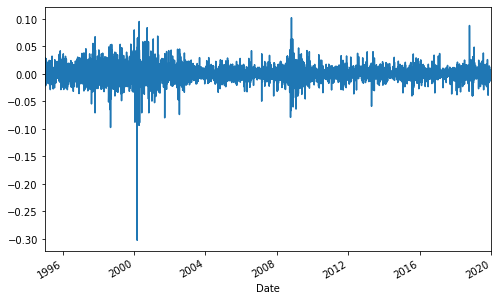

In [9]:
#Gráfico matrix 8 x 5 de retorno diarios
PG['simple_return'].plot(figsize=(8, 5))
plt.show()

In [10]:
#REtorno médio da PG ao longo do período em análise
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0005665220034561267

In [11]:
#Taxa média diária em relação ao ano, cerca de 250 dias
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.14163050086403167

In [17]:
#Média de retorno anual
print (str(round(avg_returns_a, 5) *100) + '%')

14.163%


### **`Calculando Retornos Logaritmicos`**

Log Returns ln (Pt/Pt-1)
Pt => Preço no tempo t

In [18]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.400181,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.348878,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.259093,-0.014142
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.271922,0.002050
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.246270,-0.004090


In [22]:
#Adiciona a coluna log_return
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014243
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2019-12-31    0.003449
2020-01-02   -0.012001
2020-01-03   -0.006748
2020-01-06    0.001386
2020-01-07   -0.006211
Name: log_return, Length: 6298, dtype: float64


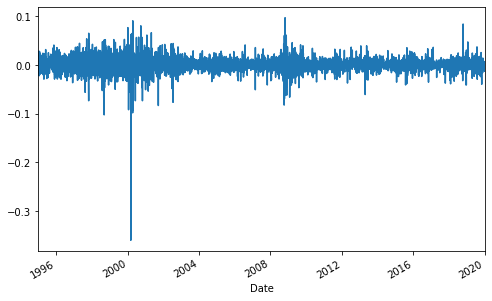

In [30]:
PG['log_return'].plot(figsize = (8, 5))
plt.show()

In [32]:
#Taxa média ao dia, cerca de 250 dias
log_return_d = PG['log_return'].mean()
log_return_d

0.000468097941809954

In [33]:
#taxa média ao ano
log_return_a = PG['log_return'].mean()*250
log_return_a

0.11702448545248849

In [34]:
#Retorno médio anual
print(str(round(log_return_a, 5)*100) + '%')

11.702%
